In [1]:
import matplotlib.pyplot as plt
import tifffile
import cv2
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import numpy as np
import os
from utilities import *

In [1]:
from networksVaryingKernel_BYOL import *

In [7]:
model = Model_BYOL(3, 8)
online_lr = 0.001
target_lr = 0.002
optimizer = torch.optim.SGD([{"params": model.model_online.parameters(), "lr": online_lr},
                            {"params": model.model_target.parameters(), "lr": target_lr}],
                            momentum = 0.0, weight_decay=0.001)

In [10]:
path = '../datasets/Vaihingen/Vaihingen_tiff/gt'
v_count = np.array([0,0,0,0,0,0])
for i in os.listdir(path):
    gt = convert_from_color(tifffile.imread(os.path.join(path,i)))
    # print(np.bincount(gt.reshape(-1), minlength=6).shape)
    # print(v_count.shape)
    v_count += np.bincount(gt.reshape(-1), minlength=6)
print(v_count)

# [46792757 43779851 35766767 38534748  2096078  1317670]

[46792757 43779851 35766767 38534748  2096078  1317670]


In [11]:
path = '../datasets/Potsdam/Potsdam_tiff/5_Labels_all'
p_count = np.array([0,0,0,0,0,0])
for i in os.listdir(path):
    gt = convert_from_color(tifffile.imread(os.path.join(path,i)))
    p_count += np.bincount(gt.reshape(-1))
print(p_count)

# [428815075 375360165 337975984 245488514  59340388 101019874]

[428815075 375360165 337975984 245488514  59340388 101019874]


In [12]:
v_count_3 = [v_count[0]+v_count[4], v_count[1]+v_count[5], v_count[2]+v_count[3]]
p_count_3 = [p_count[0]+p_count[4], p_count[1]+p_count[5], p_count[2]+p_count[3]]

In [26]:
list(palette.values())

[(255, 255, 255),
 (0, 0, 255),
 (0, 255, 255),
 (0, 255, 0),
 (255, 255, 0),
 (255, 0, 0),
 (0, 0, 0)]

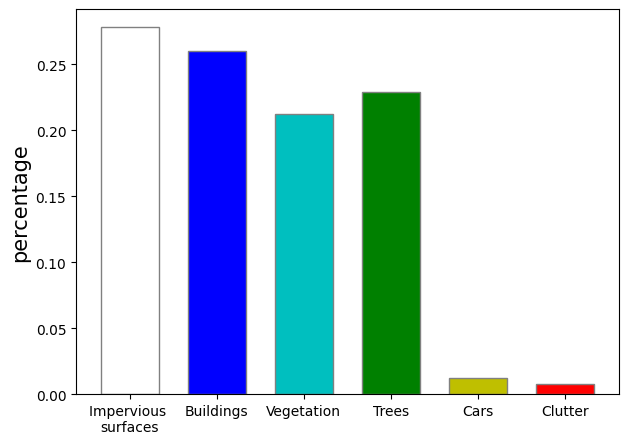

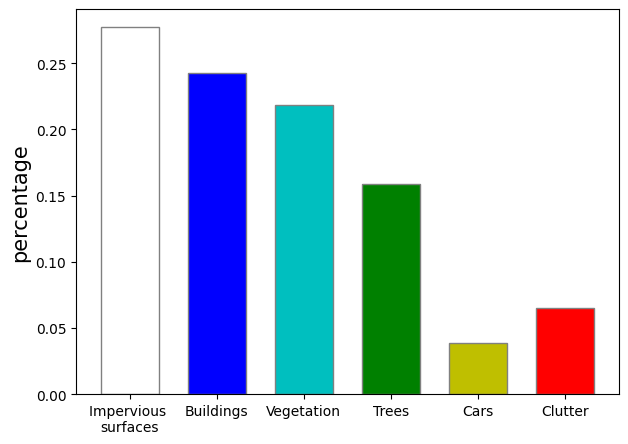

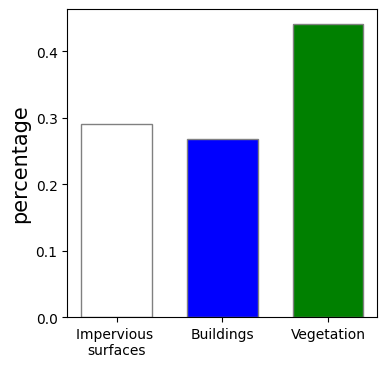

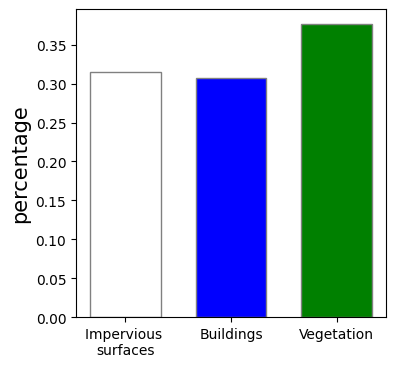

In [67]:
palette = {0 : (255, 255, 255), # Impervious surfaces (white)
           1 : (0, 0, 255),     # Buildings (blue)
           2 : (0, 255, 255),   # Low vegetation (cyan)
           3 : (0, 255, 0),     # Trees (green)
           4 : (255, 255, 0),   # Cars (yellow)
           5 : (255, 0, 0),     # Clutter/background (red)
           6 : (0, 0, 0)}       # Undefined (black)

# colours = list(palette.values())
def fun(counts, labels):
        barWidth = 0.15
        if len(counts) == 6:
                plt.figure(figsize=(7, 5))
        else:
                plt.figure(figsize=(4, 4))
        for i in range(len(colours)):
                plt.bar(i*barWidth, counts[i], color =colours[i], width = 0.1, edgecolor ='grey', label =labels[i])
        plt.ylabel('percentage',  fontsize = 15)
        plt.xticks([r* barWidth for r in range(len(colours))], labels)
        # ax = plt.gca()
        # plt.bar_label(ax.containers[0])
        plt.show()


colours = ['w','b', 'c', 'g', 'y', 'r']
labels = ['Impervious \nsurfaces', 'Buildings', 'Vegetation', 'Trees', 'Cars', 'Clutter']
counts = v_count/np.sum(v_count)
fun(counts, labels)
counts = p_count/np.sum(p_count)
fun(counts, labels)




colours = ['w','b', 'g']
labels = ['Impervious \nsurfaces', 'Buildings', 'Vegetation']
counts = v_count_3/np.sum(v_count)
fun(counts, labels)
counts = p_count_3/np.sum(p_count)
fun(counts, labels)
